# Programming for Data Analysis Practical Assignment 2018


## Create a Jupyter notebook explaining the use of the numpy.random package in Python. Including detailed explainations of at lease five of the distributions provided for the package. 

### There are four distinct tasks to be carried out:


##### 1. Explain the overall purpose of the package.

##### 2. Explain the use of the "Simple random data" and Permutations" functions.

##### 3. Explain the use and purpose of at least five "Distributions" functions.

##### 4. Explain the use of seeds in generating pseudorandom numbers.

![title](img/NumPy.jpeg)

In [1]:
# Import the package for array operations and plotting
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import random
plt.rcParams['figure.figsize'] = (8, 6)

### Task 1
#### Explain the overall purpose of the package

NumPy, short for Numerical Python, is a package for performing multidimensional array operations. It enables arithmetic reading and writing operations on large arrays of data without the need to write loops. When used with other packages such as matplotlib and Pandas it enables you to plot charts from arrays that contain large amounts of data as well as the calculation of summary statistics. It also includes a package for generating pseudorandom numbers (also known as PRNG's). 

numpy.random is the routine docstring in the NumPy package for the generation of pseudorandom numbers. The purpose of this package is to create random numbers based on various different types of statistical distributions. Such as uniform, binomial, chi-squared  et cetera. Further details regarding how pseudorandom numbers are generated can be found within my answer to Task 4.  

Random numbers generators have a variety of applications, numpy.random has the capability to generate numbers according to a known statistical distribution. In data analytics once the statistical properties of a system under investigation is known, for example it has as binomial distribution rather than collecting the sample data one use the package to generate sample data that is identical to the system of study, potentially saving much time and expense. This process of performing an experiment using randomly generated data is called simulation. 

The NumPy.random package can also be used randomly select samples from a population to check the validity of conclusions that are being drawn from the whole poplution select random samples to check the hypothesis remains true for a smaller popluation size. 

This method of using random numbers and probability to solve problems is called the Monte Carlo Method. The name was coined by S. Ulam and Nicholas Metropolis (Hoffman, 1998; Metropolis and Ulam, 1949) in reference to gambling games played in Monte Carlo Monaco.

It is a method for iteratively evaluating a model with known statistical attributes using sets of random numbers as inputs. This method is often used when the model is complex, nonlinear, or involves more than just a couple uncertain parameters. A simulation can typically involve over 10,000 evaluations of the model, a task which in the past was only practical using super computers. 
(Courtesy of Agusteen Peter)

### Task 2
#### Explain the use of "Simple random data" and "Permutations" functions

#### Simple random data

The NumPy v1.15 manual lists ten functions for Random Sampling of Simple random data, however four are essentially duplicates that return random floats in the half-open interval. 

Each function accepts interger and/ or float paramaters and returns intergers, or ndarray of intergers based on the 
size parameter given. 

In [2]:
# numpy.random.randn() uniform distribution between zero and up to but not including 1
# Create a three dimensional random array based on a uniform distribution
np.random.rand(3,2, 3)

array([[[0.24835671, 0.99247216, 0.02556418],
        [0.41580888, 0.01571839, 0.55062468]],

       [[0.27442505, 0.80202126, 0.96714164],
        [0.30887528, 0.75958513, 0.98087891]],

       [[0.31136855, 0.92606717, 0.89367681],
        [0.01546175, 0.11953464, 0.76963509]]])

In a uniform distribution values are roughly evenly spread across the sample range. It would be used to produce random values in cases where we have no preference for one value over another

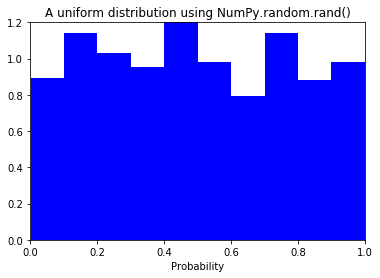

In [24]:
# Plot the output of the NumPy.random.rand() function in a histogram
arr = np.random.rand(1000)
count, bins, ignored = plt.hist(arr, color='b', density=True)
plt.axis([0, 1, 0, 1.2])
plt.xlabel("Probability")
plt.title("A uniform distribution using NumPy.random.rand()")
plt.show()

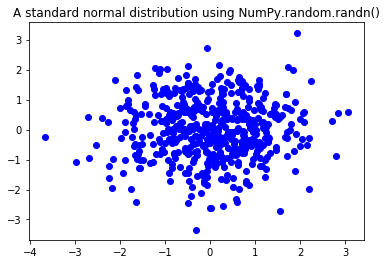

In [25]:
"""
Scatter plot of 500 x, y values from NumPy.random.randn() returning a standard normal distribution, centred around zero
with a variance of 1
"""

x = np.random.randn(500)
y = np.random.randn(500)
plt.scatter(x, y, color='b')
plt.title("A standard normal distribution using NumPy.random.randn()")
plt.show()


You can see from the above diagram the majority of the dots cluster between zero and one, and become less frequent as we move across the x and y axis. 

#### Permutations

The permutations function orders arranges a series of numbers or a list. And can be used to change the order of samples in a given range or list. 

This can be done either by specifying a range:

In [5]:
# Imagine assigning a number to each card in a deck of cards and creating a program to shuffle them randomly
np.random.permutation(range(1, 53))

array([47, 19, 32, 46, 43, 18,  6,  1, 31, 20,  3, 30, 29, 44, 42, 33, 13,
       27,  4, 38, 52, 14, 22, 12, 17, 37,  2, 25,  9, 41, 26, 16, 39, 11,
       50, 48, 10, 40, 23, 21, 36, 24, 49, 51, 45,  8, 28, 15, 35, 34,  7,
        5])

Or by passing a list, in this case tuples denoting the face cards from a deck of cards

In [6]:
# Arrange a list face cards a random order
np.random.permutation(['Ace', 'Queen', 'King', 'Jack', 'Joker'])

array(['King', 'Queen', 'Ace', 'Joker', 'Jack'], dtype='<U5')

### Task 3
#### Explain the use and purpose of at least 5 "Distributions" functions

Distributions in NumPy refers to Probability Distributions. 'Probability' meaning the extent to which something or case is to likely to occur. 'Distributions' indicating that the there are many different patterns of probability, these different patterns of probability have been observed by mathematicians and statisticians for centuries, and several of them have expressed the patterns of probability as mathematical algorithms: lending them names like Poisson, Gaustian and Pareto. We can use their distribution algorithms to deepen our understanding of our data, to analyse the systems we study to inform us to what extent our data describes the likelihood of an event or case occurring.It is important to note that the sum of all probablilities is always equal to one.

After defining the probability distribution for a dataset we can predict the outcomes based on new observations (datapoints) moving us from Descriptive Analytics to Predictive Analytics. 

In this task I will explain the use and purpose of the Binomian, Normal, Chi-Square, Uniform and Pareto Distributions. Before doing so I will relate the inter-connections as described by John D. Cook in his Blog post at https://www.johndcook.com/blog/distribution_chart/. 

###### Interconnections between Binomial and Normal distributions
"Binomial / normal: If X is a binomial(n, p) random variable and Y is a normal random variable with the same mean and variance as X, i.e. np and np(1-p), then for integers j and k, P(j ≤ X ≤ k) ≈ P(j – 1/2 ≤ Y ≤ k + 1/2). The approximation is better when p ≈ 0.5 and when n is large. A binomial(n, p) random variable X can be thought of as the sum of n Bernoulli random variables Xi. Applying the Central Limit Theorem to this sum shows that FX, the CDF (cumulative distribution function) of X, is approximately equal to FY, the CDF of a normal random variable Y with the name mean and variance as X. That is, Y has mean np and variance npq where q = 1-p." 

###### Interconnections between Normal and Chi-square distributions
"The square of a standard normal random variable has a chi-squared distribution with one degree of freedom. The sum of the squares of n standard normal random variables is has a chi-squared distribution with n degrees of freedom."

##### Simplified Diagram of inter-connections between statistical distributions

![title](img/Simple.jpg)

###### A dashed line in the chart below indicates an approximate (limit) relationship between two distribution families. A solid line indicates an exact relationship: special case, sum, or transformation.

##### Image courtesy of John D. Cook and adapted from the chart originally published by Lawrence Leemis in 1986 (Relationships Among Common Univariate Distributions, American Statistician 40:143-146.)

##### Full Diagram of inter-connections between statistical distributions


![title](img/Complex.jpg)

##### Image courtesy of Lawrence M. LEEMIS and Jacquelyn T. MCQUESTON and can be found at http://www.math.wm.edu/~leemis/2008amstat.pdf

#### Binomial distributions: numpy.random.binomial()

Binomial distributions give the discrete (whole number) probability distribution for obtaining a number of successes out of a series of trials and can be expressed by the equation:

![title](img/binomial.jpg)

Where P is the probability, and n is the number of successes out of N Bernoulli trials. 

Binomial distributions are the result of repeated trials were there are two possible outcomes, typically termed either success or failure (this is what is known as a Bernoulli trial). Trials are independed in such as the outcome of one or more of the trails do not effect one another, and the likelihood of success of failure is equal. Coin tosses are often used to illustate binomial experiments as there are two possible outcomes, either heads or tails. If the desired outcome is heads, and the coin is unbiased, the probability of tossing the coin and successfully obtaining a heads is 50% or more correctly 0.5. 

In [7]:
"""numpy.random.binomial(n, p, size=None) n = number of trials, p = probability of successfull outcomes, 
size = times the trials are repeated"""

# Create a game where you toss a coin ten times, and count how many times 'heads' is returned.
# Repeat the game ten times

np.random.binomial(10, 0.5, 10)


array([3, 5, 5, 3, 3, 3, 3, 5, 7, 7])

The above array displays, according to a binomial distribution, the randomly selected times that 'heads' has been returned for eacah game of 10 coin tosses, repeated 10 times. 

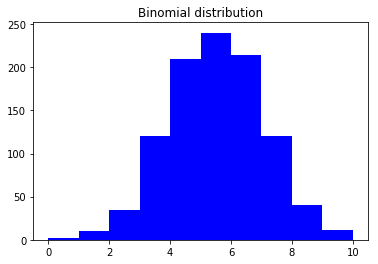

In [8]:
"""A histogram of a binomial distribution you can see who often heads was returned for each game of 10 coin 
tosses this time repeated 1000 times"""

plt.hist(np.random.binomial(10, 0.5, 1000), color='b')
plt.title("Binomial distribution")
plt.show()

#### Normal distribution: numpy.random.normal()
Data is normally distributed when 50% of the values are above the mean and 50% are below the mean. In other words mean = median = mode. And where 99.7% of the data is within three standard deviations of the mean.

The probablility of a normal distribution is mathematically expressed as:

![title](img/normal.jpg)

The numpy.random.normal() distribtion function will randomly generate values according to this distribution. it accepts the mean, standard deviation and number of integers to be returned. 

In [9]:
# Generate ten random numbers in a normal distribution, centered around a mean of zero with a standard deviation of one.
np.random.normal(0, 1.0, 10)

array([-0.56795899, -1.28652243,  0.50479995, -1.01654708, -0.68474559,
       -0.49209966, -1.04129529,  0.11969531,  0.99641393,  0.59859308])

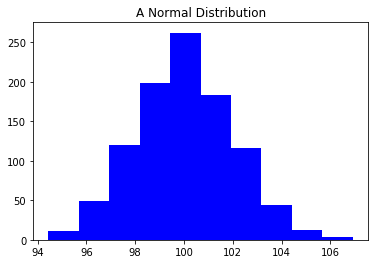

In [10]:
# Plot a histogram of 1000 random numbers with a mean of 100 and a standard deviation of 2
plt.hist(np.random.normal(100, 2.0, 1000), color='b')
plt.title("A Normal Distribution")
plt.show()

#### Chisquare distribution: numpy.random.chisquare()

This function returns randomly drawn samples from a chi-square distribution according to the parameters provided. 

![title](img/chi.png)

Where O equals the observed values and E equals expected values. Chi-squared is equal to the sum of all the observed values, minus the expected values, squared, and divided by the expected values. 

The chi-squared test is used in hypothesis testing as it measures to what extent differences in observed values could actually be random, any patterns being due to chance, because it measures how well the observed distribution of data fits with the distribution that would be expected if the variables were independent.

It is only used for categorical (nominal) values, values that can be counted and divided into categories, and cannot be used for solely numerical (ordinal) values. For instance you could ask a random sample of people do would they prefer to win a beach holiday or a hiking holiday. Divide the sample popluation into male and female categories, and then perform a chi-squared test to indicate if gender influences which type of holiday is preferred. 

In numpy.random.chisquare(df, size=None) df is equal to the degrees of freedom and must be greater than zero. Degrees of freedom are defined as the number of independent values or quantities which can be assigned to the statistical distribution. Size is equal to the number of samples drawn. 

Random data with a chi-squared distribution could be used when we want to create a sample with noise and test a algorism to detect relationships

In [11]:
# Select randomly select 4 samples with two degrees of freedom
np.random.chisquare(2, 4)

array([1.4466385 , 4.65572   , 1.39965495, 2.86420643])

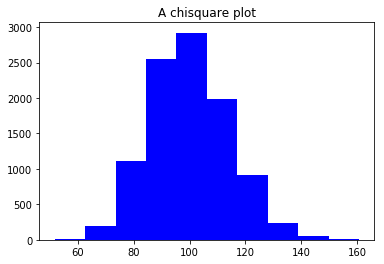

In [12]:
# Plot a histogram randomly selecting 40 samples with a Pareto Index of 1

plt.hist(np.random.chisquare(100, 10000),color='b')
plt.title("A chisquare plot")
plt.show()

#### Pareto distribution: numpy.random.pareto()
A Pareto distribution is based on the Pareto Principle that describes how inputs and outputs are unbalanced. It is named after economist Vilfredo Pareto and originated when he proposed that 80% of the land in Italy was owned by 20% of the population. It is commonly used in business to describe either that 80% of output is generated from 20% of the input. For instance 80% of revenue is generated by 20% of customers. As well as in continuous improvement, when it is often described you can get 80% of the benefits by addressing 20% of the problems. 

A pareto distribution is expressed mathematically as follows:

![title](img/pareto.jpg)

numpy.random.pareto() generates random samples from a pareto distribution where you input the shape (aka slope or Pareto Index) of the distribution and number of samples to be drawn. 

Random values with a Pareto distribution would be created when one wants the majority to be a specific value and then to 
'tail-off' at a give rate, the tail-off rate is known as either the slope or the Pareto Index. 

In [13]:
# Generate 10 random numbers in a pareto distribution with a Pareto Index of 10
np.random.pareto(10, 10)

array([0.05005512, 0.22554571, 0.0137169 , 0.0106815 , 0.05452869,
       0.15169586, 0.01423915, 0.06637653, 0.09865799, 0.14070635])

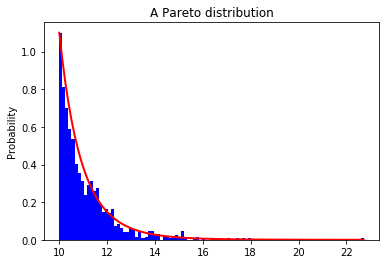

In [14]:
# Plot 1000 values on a Pareto Histogram with an index of ten. 
a, m = 10, 10
s = (np.random.pareto(a, 1000) + 1) * m 
count, bins, _ = plt.hist(s, 100, color='b', density=True)
fit = a*m**a / bins**(a+1)
plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
plt.ylabel("Probability")
plt.title("A Pareto distribution")
plt.show()

#### Uniform distribution: numpy.random.uniform()

![title](img/uniform.jpg)

In a uniform distribution values are roughly evenly spread across the sample range. It would be used random values in cases where we have no preference for one value over another

In [15]:
np.random.uniform(low=0.0, high=1.0, size=10)

array([0.37695123, 0.63166735, 0.74200183, 0.11705851, 0.83537465,
       0.91604497, 0.35619072, 0.07293957, 0.34991361, 0.24369945])

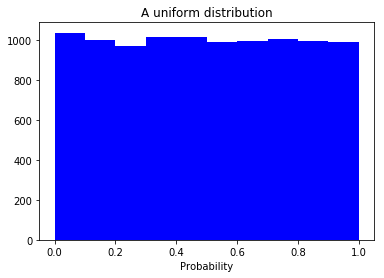

In [16]:
plt.hist(np.random.uniform(low=0.0, high=1.0, size=10000), color='b')
plt.xlabel("Probability")
plt.title("A uniform distribution")
plt.show()

### Task 4

#### Explain the use of seeds in generating pseudorandom numbers.

Computers cannot generate truly random numbers, a truely random number can only be generated by converting actual random events into a series of numbers, for instance observing random events in nature, such as micro-eddies a flowing river or measuring static electical noise from a television set. Computers use algorisims to calculate pseudorandom numbers (also known as PRNG's) that appear to be random numbers, computers require an starting number or 'Seed', to input into their algorism. Importantly, if the same seed is used in the same algorithm then the same random number(s) are always produced. 

The quality of the random number produced, in that it looks random and is difficult to predict or calculate, is based on the randomness of the seed and its length. Pseudorandom numbers repeat over given intervals (periods). The repeat is based on the length of the original seed. This is important where pseudorandom numbers are used for security, such as banking and internet security applications where data is encoded. The longer the seed the larger the population from which the random number is generated and the longer the intervals between periods where they repeat. Therefore security increases as the length of the seed increases. In security applications the objective is to be 'practically safe' in such that the length of time required to compute all the possible seeds for a given PRNG makes it impractical to attempt to calculate it. However as computational power of computers increases longer seeds are required in order to remain 'practically safe'. 

A seed can be automatically selected based on a computer system's random number generator device or its clock. A seed can also be set by the user, again if the same seed is used in the future the same set of random numbers is created.

The generation of pseudorandom numbers in NumPy is based on the Mersenne Twister: a 623-dimensionally equidistributed uniform pseudorandom number generator. 

The Mersenne Twister was first proposed in 1998 by Makato Matsumoto and Takuji Nishimura of Keio University to solve the problem of generating 'high-quality' random numbers with computers, it is now the basis of how the NumPy package creates pseudorandom numbers. It is important to reiterate that PRNG's are not truly random numbers, they are based on complex algorithms such as MT19937. 

numpy.random.RandomState is the container for the random Mersenne Twister pseudo-random number generator. The call numpy.random.seed() allows the seed to be set.

In [28]:
# Create an array containing 3 lists, each list containing the numbers 1 - 5 and randomly shuffle them. 
# A different combination will occur in each list everytime the code is run. 

for i in range(3):
    x = np.arange(1,6)
    np.random.shuffle(x)
    print(x)

[4 3 1 5 2]
[1 5 4 3 2]
[5 4 3 2 1]


In [29]:
# With the same array set the set seed, the same combination will occur in each list every time the code is run 

for i in range(3):
    x = np.arange(1,6)
    random.seed(1)  
    np.random.shuffle(x)
    print(x)

[3 2 5 1 4]
[3 2 5 1 4]
[3 2 5 1 4]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


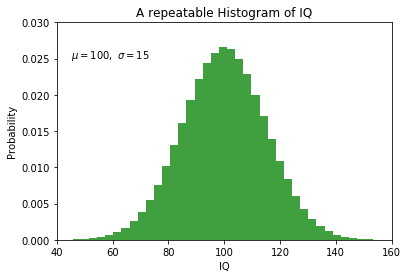

In [30]:
# Fixing random state for reproducibility. In this case a normal, or bell shaped, distribution of intelligence. 
# By setting the seed the same distribution will occur everytime the code is run
np.random.seed(2)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(1000000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed='1', facecolor='g', alpha=0.75)
plt.xlabel('IQ')
plt.ylabel('Probability')
plt.title('A repeatable Histogram of IQ')
plt.text(45, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(False)
plt.show()

# Code courtesy of https://matplotlib.org/users/pyplot_tutorial.html

The Numpy user manual strongly recommends that users do not use the set_state() and get_state() unless they know 
exactly what they are doing and that they are not needed to work with any of the random distributions in NumPy. Therefore I only describe their functionality here.

numpy.random.get_state() returns a tuple representing the internal state of the generator.

numpy.random.set_state() sets the internal state of the generator from a tuple. For use if one has reason to manually 
(re-)set the internal state of the “Mersenne Twister”[1] pseudo-random number generating algorithm.

## End
###### Please refere to README.md for full list of references